In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/AI/ML/Nonlinear_Regression/sales.csv")
df

,Weeks,Total
0,4,88
1,20,62
2,52,118
3,56,149
4,72,193
5,80,167
6,168,192
7,200,229
8,228,319
9,296,311


In [2]:
from sklearn.linear_model import LinearRegression


X = df[['Weeks']]

y = df['Total']

model = LinearRegression()

model.fit(X, y)

print('Intercept:', round(model.intercept_,2))
print('Coefficients:', round(model.coef_[0],2))

Intercept: 115.99
Coefficients: 0.53


In [3]:
y_pred = model.predict(X)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

print ('MSE :', round(mean_squared_error (y_pred, y), 2))
print ('RMSE :', round(sqrt(mean_squared_error (y_pred, y)), 2))
print ('MAE :', round(mean_absolute_error(y_pred, y)))

MSE : 1915.78
RMSE : 43.77
MAE : 37


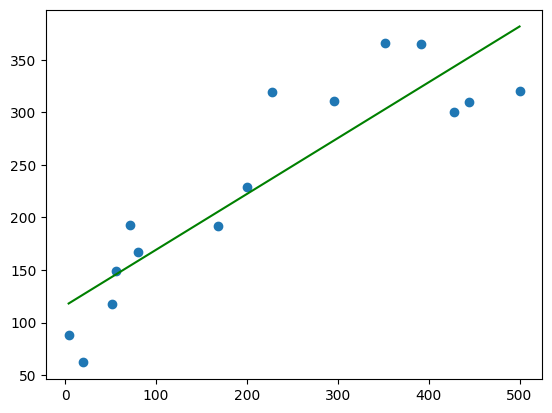

In [4]:
df['prediction'] = model.predict(X)

import matplotlib.pyplot as plt

xpoints = df['Weeks']
ypoints = df['Total']
ypredpoints = df['prediction']

plt.scatter(xpoints, ypoints)
plt.plot(xpoints, ypredpoints, color='green')

plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=2, include_bias=False)

XNew = polynomial.fit_transform(X)
print(XNew)

[[4.00000e+00 1.60000e+01]
 [2.00000e+01 4.00000e+02]
 [5.20000e+01 2.70400e+03]
 [5.60000e+01 3.13600e+03]
 [7.20000e+01 5.18400e+03]
 [8.00000e+01 6.40000e+03]
 [1.68000e+02 2.82240e+04]
 [2.00000e+02 4.00000e+04]
 [2.28000e+02 5.19840e+04]
 [2.96000e+02 8.76160e+04]
 [3.52000e+02 1.23904e+05]
 [3.92000e+02 1.53664e+05]
 [4.28000e+02 1.83184e+05]
 [4.44000e+02 1.97136e+05]
 [5.00000e+02 2.50000e+05]]


In [6]:
model2 = LinearRegression()

model2.fit(XNew, y)

print('Intercept:', model2.intercept_)
print('Coefficients:', model2.coef_)

Intercept: 65.98710740550433
Coefficients: [ 1.33308721 -0.00166673]


In [7]:
y_pred2 = model2.predict(XNew)

print ('MSE :', round(mean_squared_error (y_pred2, y), 2))
print ('RMSE :', round(sqrt(mean_squared_error (y_pred2, y)), 2))
print ('MAE :', round(mean_absolute_error(y_pred2, y)))

MSE : 812.28
RMSE : 28.5
MAE : 25


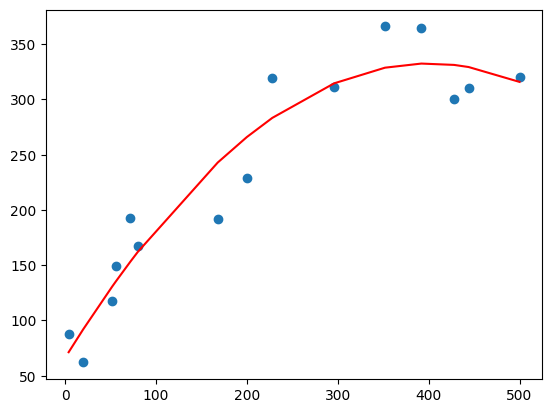

In [8]:
df['non-linear-prediction'] = model2.predict(XNew)

xpoints = df['Weeks']
ypoints = df['Total']
ypredpoints2 = df['non-linear-prediction']

plt.plot(xpoints, ypredpoints2, color='red')
plt.scatter(xpoints, ypoints)
plt.show()

In [9]:
weeks= [[550]]

weeksNew = polynomial.fit_transform(weeks)

ypred = model2.predict(weeksNew)
print(ypred)

[294.99802584]


In [10]:
ypred = model2.intercept_ + model2.coef_[0]*weeks[0][0] + model2.coef_[1]*weeks[0][0]*weeks[0][0]
print(ypred)

294.9980258431395
